# Linear Regression with Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros

## Step 1:  Load Data

Let's create a data set. 

In [2]:
X = np.arange(50)
y = 2 * X + 1 + np.random.randn(50)*8

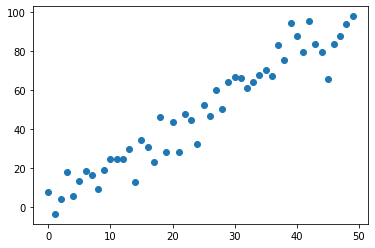

In [3]:
plt.scatter(X,y)
plt.show()

## Step 2: Build the model

In this case, it would be a linear regression.  So we are trying to have a line $$y = Wx + b$$. 

We use $W$, instead of $m$, because $W$ is more conventional letter in data science

We want to find $W$ and $b$ such that minimizes the equation $$ E = \frac{1}{N} \sum_{i = 1}^N (y_i - \hat{y}_i)^2 $$

By replacing, $\hat{y}_i = Wx_i + b$, we have $$ E = \frac{1}{N} \sum_{i=1}^N (y_i - (Wx_i +b))^2 $$

Now, $$\frac{\partial E}{\partial W} = \frac{1}{N} \sum_{i=1}^N 2(y_i - Wx_i - b)(-x_i) = -\frac{2}{N}\sum_{i=1}^N x_i(y_i - \hat{y}_i)$$

$$\frac{\partial E}{\partial b} = \frac{1}{N} \sum_{i=1}^n 2(y_i -Wx_i -b)(-1) = -\frac{2}{N}\sum_{i=1}^N (y_i - \hat{y}_i)$$

We will apply gradient descent $ W = W - \eta \cdot \nabla E$

In [4]:
def model(X,y):

    W = 0 
    b = 0 

    lr = 0.0001
    epochs = 1000

    N = float(len(X))

    for i in range(epochs):
        yhat = W*X + b
        Ew = (-2/N) * (X.dot(y) - W * X.dot(X) + b * sum(X))
        Eb = (-2/N) * (sum(y) - sum(yhat))
        W = W - lr * Ew
        b = b - lr * Eb
        
    return W, b, yhat

## Step 3 : Train Model

It will return three values: $W, b$ and predicted values $\hat{y}$. 

In [5]:
model(X,y)

(1.966275347301653,
 0.10100943607618615,
 array([ 0.10097489,  2.06724919,  4.03352348,  5.99979778,  7.96607208,
         9.93234638, 11.89862068, 13.86489497, 15.83116927, 17.79744357,
        19.76371787, 21.72999217, 23.69626646, 25.66254076, 27.62881506,
        29.59508936, 31.56136366, 33.52763795, 35.49391225, 37.46018655,
        39.42646085, 41.39273515, 43.35900945, 45.32528374, 47.29155804,
        49.25783234, 51.22410664, 53.19038094, 55.15665523, 57.12292953,
        59.08920383, 61.05547813, 63.02175243, 64.98802672, 66.95430102,
        68.92057532, 70.88684962, 72.85312392, 74.81939822, 76.78567251,
        78.75194681, 80.71822111, 82.68449541, 84.65076971, 86.617044  ,
        88.5833183 , 90.5495926 , 92.5158669 , 94.4821412 , 96.44841549]))

## Step 4: Evaluate the Model

In [6]:
print("predicted values are", model(X,y)[2])

predicted values are [ 0.10097489  2.06724919  4.03352348  5.99979778  7.96607208  9.93234638
 11.89862068 13.86489497 15.83116927 17.79744357 19.76371787 21.72999217
 23.69626646 25.66254076 27.62881506 29.59508936 31.56136366 33.52763795
 35.49391225 37.46018655 39.42646085 41.39273515 43.35900945 45.32528374
 47.29155804 49.25783234 51.22410664 53.19038094 55.15665523 57.12292953
 59.08920383 61.05547813 63.02175243 64.98802672 66.95430102 68.92057532
 70.88684962 72.85312392 74.81939822 76.78567251 78.75194681 80.71822111
 82.68449541 84.65076971 86.617044   88.5833183  90.5495926  92.5158669
 94.4821412  96.44841549]


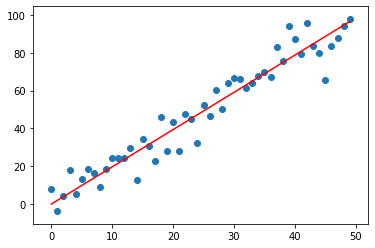

In [7]:
plt.plot(X, model(X,y)[2], color = 'red')
plt.scatter(X, y)
plt.show()

## Step 5: Make a prediction

In [8]:
def model_prediction(X_input):
    yhat = X_input * model(X,y)[0] + model(X,y)[1]
    print(yhat)

In [9]:
model_prediction(53)

104.31360284306379
